## KNN알고리즘에 사용할 견종의 표본집합 시각화

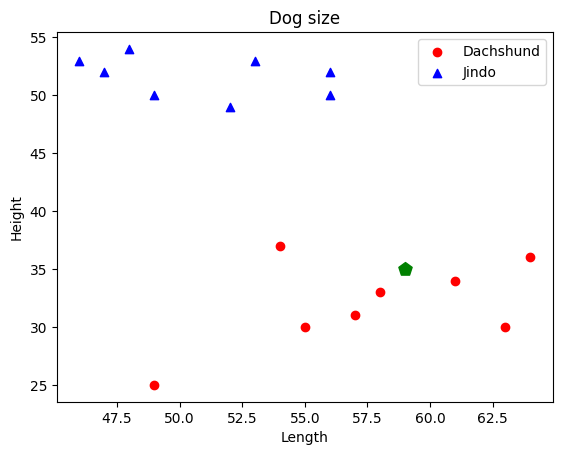

In [10]:
import matplotlib.pyplot as plt

#닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]

#진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height, c='b', marker='^', label='Jindo')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='best') #loc = 'upper right'도 사용가능!\

newdata_length = [59]
newdata_height = [35]

plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='g', label='new data')

In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data)) #닥스훈트는 0으로 레이블링

j_data = np.column_stack((jin_length, jin_height))
j_label = np.zeros(len(j_data)) #진돗개는 1로 레이블링

newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

dog_classes = {0:'닥스훈트', 1:'진돗개'}
k=3 #k를 3으로 두고 kNN 분류기 만들기

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정결과:', dog_classes[y_pred[0]])





데이터 [[59, 35]] , 판정결과: 닥스훈트


## 3.8 데이터 전처리의 필요성

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


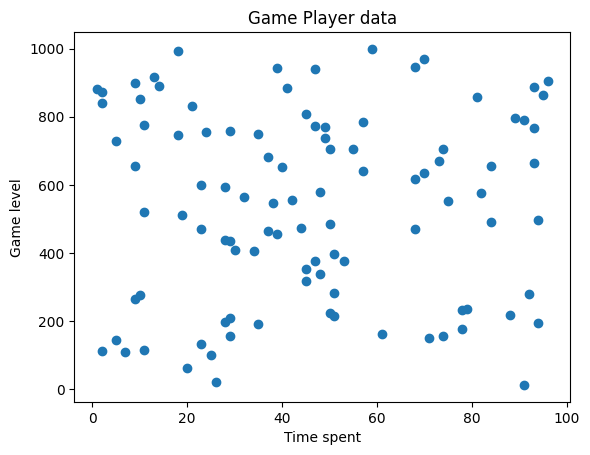

In [16]:
X = game_usage['time spent']
Y = game_usage['game level']

#으뜸 게임사의 게임 이용자 분석 : 산포도 그래프
plt.title('Game Player data')
plt.xlabel('Time spent')
plt.ylabel('Game level')
plt.scatter(X, Y)


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.0, 1000.0)

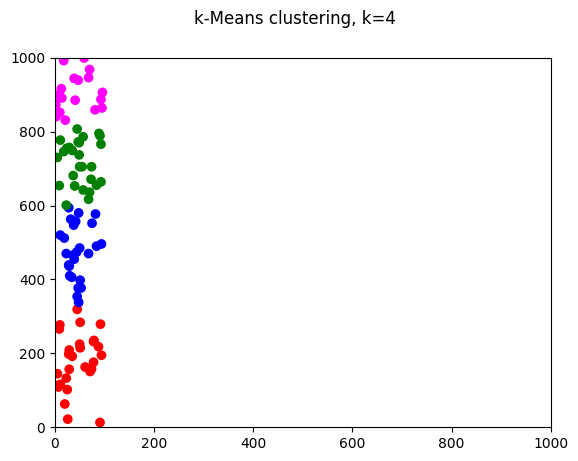

In [27]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
    model = cluster.KMeans(n_clusters=k)
    model.fit(data)
    labels = model.predict(data)
    colors = np.array(['red', 'green', 'blue', 'magenta'])
    plt.suptitle('k-Means clustering, k={}'.format(k))
    plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
kmeans_predict_plot(gamer_data, k = 4)
plt.xlim(0, 1000); plt.ylim(0, 1000)


# 데이터 정규화 방법을 이용하자

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #min-max 스케일러 객체 생성
scaler.fit(gamer_data) # gamer_data를 피팅
n_data = scaler.transform(gamer_data) #gamer_data를 0에서 1 사이 값으로
n_data[:, 0].mean(), n_data[:, 1].mean()

(0.4731578947368421, 0.5324949290060852)

In [29]:
n_data[:, 0].min(), n_data[:, 0].max() #첫번째 열의 최소값, 최대값

(0.0, 1.0)

In [30]:
n_data[:, 1].min(), n_data[:, 1].max() #두번째 열의 최소값, 최대값

(0.0, 1.0)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


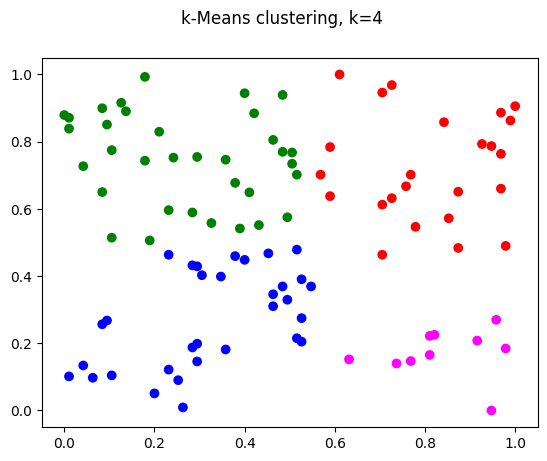

In [35]:
kmeans_predict_plot(n_data, k=4)

In [37]:
import numpy as np
a = np.array([10, 8, 10, 8, 8, 4])
print('합계 :', a.sum())
print('평균 :', a.mean())
print('분산 :', a.var())
print('표준편차 :', a.std())


합계 : 48
평균 : 8.0
분산 : 4.0
표준편차 : 2.0
